### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import seaborn as sns

sns.set()

### Loading Data

In [2]:
data = pd.read_csv(r'C:\Users\vamsi\Desktop\ML\13.Agglomerative Clustering\study_data.csv')
data

,repetition_time,study_time,knowledge_level
0,0.00,0.00,Low
1,0.24,0.90,High
2,0.25,0.33,Low
3,0.65,0.30,High
4,0.98,0.24,Low
...,...,...,...
253,0.92,0.58,High
254,0.19,0.60,High
255,0.29,0.77,High
256,0.61,0.26,High


In [3]:
#data = data[:50]
data = data.drop(columns='knowledge_level',axis=1)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   repetition_time  258 non-null    float64
 1   study_time       258 non-null    float64
dtypes: float64(2)
memory usage: 4.2 KB


In [5]:
data.describe()

,repetition_time,study_time
count,258.000000,258.000000
mean,0.432713,0.458539
std,0.248108,0.255211
min,0.000000,0.000000
25%,0.250000,0.250000
50%,0.330000,0.500000
75%,0.647500,0.660000
max,0.990000,0.930000


### Plotting data

Text(0, 0.5, 'Study Time')

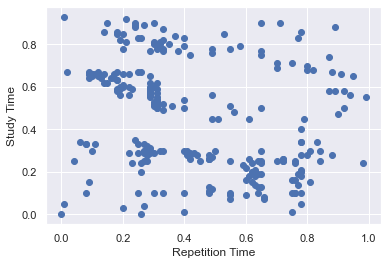

In [6]:
plt.scatter(data['repetition_time'],data['study_time'])
plt.xlabel('Repetition Time')
plt.ylabel('Study Time')

### Preparing Input data

In [7]:
from sklearn import preprocessing

data_scaled = data.copy()
data_scaled = preprocessing.scale(data)
data_scaled[:5]

array([[-1.74744134, -1.80019743],
       [-0.77824063,  1.73315205],
       [-0.73785726, -0.50463595],
       [ 0.87747726, -0.62241427],
       [ 2.21012825, -0.8579709 ]])

Text(0, 0.5, 'Study Time')

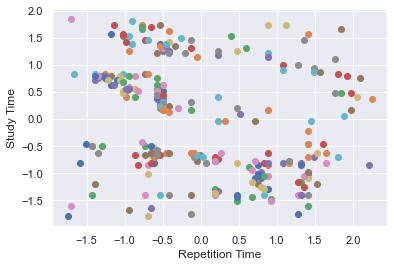

In [8]:
for i in range(data_scaled.size//2):
    plt.scatter(data_scaled[i][0],data_scaled[i][1])
plt.xlabel('Repetition Time')
plt.ylabel('Study Time')

### Elbow Method

In [9]:
from sklearn.cluster import KMeans

In [10]:
#Within cluster sum of squares
wcss = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
wcss

[516.0000000000005,
 267.8668182480292,
 165.6928343152814,
 103.24699730418467,
 82.47097800189657,
 67.98237690657507,
 58.53043828711949]

Text(0, 0.5, 'WCSS')

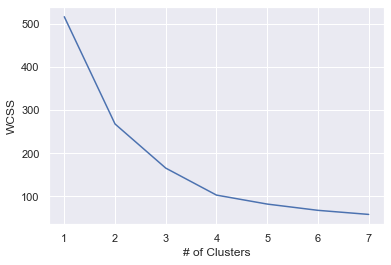

In [11]:
plt.plot(range(1,len(wcss)+1),wcss)
plt.xlabel('# of Clusters')
plt.ylabel('WCSS')

### Dendogram

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [13]:
z = linkage(data_scaled,method="ward")

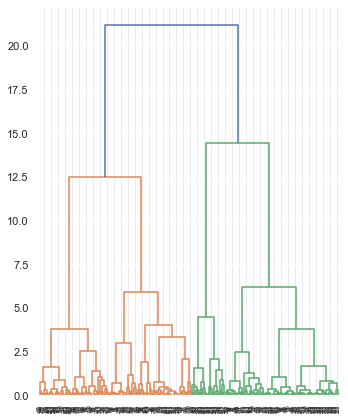

In [14]:
fig,ax = plt.subplots(figsize=(5,6))
ax = dendrogram(z)
plt.tight_layout()
plt.show()

## <font color="green">Agglomerative Clustering</font>

In [15]:
from sklearn.cluster import AgglomerativeClustering
ag = AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage="ward")
ag.fit(data_scaled)

AgglomerativeClustering(n_clusters=4)

In [16]:
cluster_data = data.copy()
cluster_data['cluster_pred'] = ag.fit_predict(data_scaled)
cluster_data

,repetition_time,study_time,cluster_pred
0,0.00,0.00,1
1,0.24,0.90,0
2,0.25,0.33,1
3,0.65,0.30,3
4,0.98,0.24,3
...,...,...,...
253,0.92,0.58,2
254,0.19,0.60,0
255,0.29,0.77,0
256,0.61,0.26,3


### Clustering Labels

In [17]:
ag.labels_

array([1, 0, 1, 3, 3, 0, 0, 1, 3, 0, 0, 1, 3, 0, 0, 0, 1, 1, 1, 1, 3, 0,
       0, 1, 3, 0, 1, 1, 2, 0, 0, 3, 3, 0, 0, 1, 3, 1, 1, 1, 3, 0, 0, 3,
       1, 0, 0, 0, 2, 0, 1, 1, 3, 0, 0, 1, 3, 0, 0, 3, 3, 0, 0, 1, 3, 1,
       1, 1, 1, 0, 0, 0, 3, 0, 0, 1, 3, 1, 1, 1, 3, 0, 0, 1, 3, 1, 0, 1,
       3, 0, 0, 3, 3, 1, 0, 3, 3, 0, 0, 1, 1, 0, 0, 1, 3, 0, 0, 1, 3, 0,
       1, 1, 2, 0, 0, 1, 3, 2, 0, 0, 3, 3, 1, 0, 2, 2, 0, 1, 3, 3, 1, 0,
       3, 2, 0, 0, 1, 3, 0, 1, 3, 3, 0, 1, 1, 2, 1, 1, 3, 2, 0, 1, 1, 3,
       0, 0, 0, 2, 0, 0, 3, 3, 0, 0, 1, 0, 0, 2, 3, 0, 1, 0, 2, 3, 0, 1,
       3, 2, 0, 0, 3, 2, 0, 1, 3, 3, 0, 0, 3, 2, 0, 0, 1, 2, 0, 1, 1, 3,
       0, 1, 3, 1, 1, 1, 2, 3, 0, 0, 1, 2, 0, 0, 2, 3, 0, 1, 1, 2, 0, 1,
       3, 3, 0, 0, 3, 2, 0, 1, 2, 2, 0, 1, 3, 2, 0, 1, 3, 0, 0, 0, 3, 2,
       0, 1, 3, 2, 0, 1, 2, 3, 0, 0, 3, 2, 0, 0, 3, 2], dtype=int64)

### Visualization

Text(0, 0.5, 'Study Time')

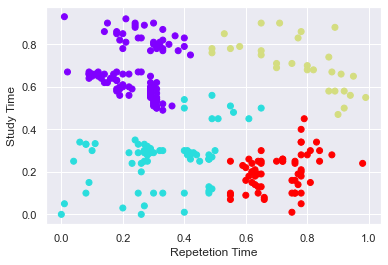

In [18]:
plt.scatter(data['repetition_time'],data['study_time'],c=cluster_data['cluster_pred'],cmap='rainbow')
plt.xlabel('Repetetion Time')
plt.ylabel('Study Time')